In [198]:
key = [["a","b","c","d","e"],
       ["f","g","h","i","j"],
       ["k","l","m","n","o"],
       ["p","q","r","s","t"],
      ["u","v","w","x","y"],
      ["z"," ","0","1","2"]]
target = """glory glory manunited glory glory manunited glory glory manunited as the reds go marching on on on just like the busby babes in days gone by well keep the red glags flying high"""

In [199]:
directions = [(-1,0),(1,0),(0,-1),(0,1)]

def BFS(locations):
    result=""
    for index in range(len(locations)-1):
        start,end = locations[index], locations[index+1]
        visited = [[False]*5 for _ in range(6)]
        visited[start[0]][start[1]] = True
        queue = [(start[0],start[1],"")]
        while queue:
            x,y,strs = queue.pop(0)
            if x==end[0] and y==end[1]:
                strs += "@"
                result += strs
                break
            for dx, dy in directions:
                nx,ny = x+dx,y+dy
                if 0<=nx<6 and 0<=ny<5:
                    if not visited[nx][ny]:
                        if (dx,dy) == (-1,0):
                            s='^'
                        elif (dx,dy) == (1,0):
                            s="_"
                        elif (dx,dy) == (0,1):
                            s=">"
                        elif (dx,dy) == (0,-1):
                            s="<"
                        queue.append((nx,ny,strs+s))
                        visited[nx][ny] = True
    return result

def simple(locations):
    result = ""
    for index in range(len(locations)-1):
        start = locations[index]
        end = locations[index+1]
        s,d="",""
        if start == end:
            result+="@"
        else:
            x,y = end[0]-start[0],end[1]-start[1]
            if x>0:
                s="_"*x
            else:
                s="^"*(-x)
            result+=s
            if y>0:
                d=">"*y
            else:
                d="<"*(-y)
            d+="@"
        result +=d
    return result
        
        

def find_loc(words):
    loc = [(0,0)]
    for st in words:
        find = False
        for i in range(len(key)):
            for j in range(len(key[i])):
                if key[i][j] == st:
                    find = True
                    loc.append((i,j))
            if find:
                break
    return loc

def solution(words):
    location = find_loc(words)
    r = BFS(location)
    return r

def solution2(words):
    location = find_loc(words)
    r = simple(location)
    return r
        

In [200]:
import time
start = time.time()
a = solution(target)
print("time :", time.time() - start) 

time : 0.004986286163330078


In [201]:
import time
start = time.time()
b = solution2(target)
print("time :", time.time() - start) 

time : 0.0009970664978027344


In [202]:
print(a)
print(b)

_>@_@>>>@_<<@_>>@_<<<@^^^^@_@>>>@_<<@_>>@_<<<@^^^>@^^<<@__>>>@__<<<@^^>>>@^@__>@^^^@<@_____<<@^^^^@_@>>>@_<<@_>>@_<<<@^^^^@_@>>>@_<<@_>>@_<<<@^^^>@^^<<@__>>>@__<<<@^^>>>@^@__>@^^^@<@_____<<@^^^^@_@>>>@_<<@_>>@_<<<@^^^^@_@>>>@_<<@_>>@_<<<@^^^>@^^<<@__>>>@__<<<@^^>>>@^@__>@^^^@<@_____<<@^^^^^<@___>>>@__<<@^^>>>@^^<<@^>>@_____<<<@^^>@^^^>>@<@___@__<<@^^^^@_>>>@___<<<@^^^>@^^<<@___>>@^^^@_@>@_@^<<@____@^^^>>>@<@___<<@^^^>>>@<@___<<@^^^>>>@<@___<<@^^^^>>>@___<<<<@^>>>@>@__<<<@^^^@^>>@_<<<@^^>>>>@_____<<<@^^>>>@^^<<@^>>@_____<<<@^^^^^@____<@^>>>@^^^<<@____>>>@_<<<@^^^^^@<@>@>>>@___<@__<<@^^^^>>@_@___<<@^^^^^>>@<<<@____>>>>@^<@__<<@^^^^@_>>>@<@^^>@_____<<<@^^^^^@____>>>@_<<<@^>@^^^^>>@__<<<@@___@^^^<@^^>>>>@@___<<<<@__>@^^>>>@^^<<@^>>@_____<<<@^^>@^^^>>@<@_____<<@^^^^@_@^^<@_>@__>>@__<<@^^^^<@_>@__>>>@^^^<@_@^<<@____@^^^^>@>@<<@>@
_>@_@>>>@_<<@_>>@_<<<@^^^^@_@>>>@_<<@_>>@_<<<@^^^>@^^<<@__>>>@__<<<@^^>>>@^@__>@^^^@<@_____<<@^^^^@_@>>>@_<<@_>>@_<<<@^^^^@_@>>>@_<<@_>>@_<<<@^^^>@^^<<@__>>>@__<<<@

In [203]:
if a == b:
    print("y")

y


#### 1.도착가능한 모든 경로의 w를 구했어야 함. (단방향 그래프)
> 다익스트라로 안하고 BFS로 했음...
#### 2. 도착한 경로들을 짧은 순으로 정렬하라고 했던 기억
> 확실하지 않음.

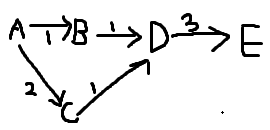

In [27]:
graph = dict()
graph['A'] = [('B',1), ('C',2)]
graph['B'] = [('D',1)]
graph['C'] = [('D',1)]
graph['D'] = [('E',3)]
graph['E'] = []

#### 내 답 
> 이러면 갈림길 - 갈림길에서 모아짐 - 다음 경로에서
- 먼저 갈림길에 모아진 경로때문에 끊김...

In [42]:
def BFS(start,end):
    visited,need_visit = list(),list()
    need_visit.append((start,0))
    result = []
    while need_visit:
        node,weight = need_visit.pop(0)
        if node == end:
            result.append(weight)
        if node not in visited:
            visited.append(node)
            temp,added = graph[node],[]
            for data in temp:
                data = list(data)
                added.append((data[0],data[1]+weight))
            need_visit.extend(added)
    return result

def solution(graph):
    answer = BFS('A','D')
    print(answer)

In [43]:
solution(graph)

[2, 3]


#### 수정 답

In [53]:
def bfs(start,dest):
    queue = [(start,[start],0)]
    result = []
    
    while queue:
        node, path, weight = queue.pop(0)
        if n == dest:
            result.append(weight)
        else:
            for m in graph[n]:
                p = set(m[0]) - set(path)
                queue.append((m,path+[m[0]]))
    return result

In [54]:
def solution(graph):
    answer = bfs('A','D')
    print(answer)

In [55]:
graph = {'A': set(['B', 'C']),
         'B': set(['A', 'D', 'E']),
         'C': set(['A', 'F']),
         'D': set(['B']),
         'E': set(['B', 'F']),
         'F': set(['C', 'E'])}

In [56]:
def bfs(graph, start):
    visited = []
    queue = [start]

    while queue:
        n = queue.pop(0)
        if n not in visited:
            visited.append(n)
            queue += graph[n] - set(visited)
    return visited

In [57]:
def bfs_paths(graph, start, goal):
    queue = [(start, [start])]
    result = []

    while queue:
        n, path = queue.pop(0)
        if n == goal:
            result.append(path)
        else:
            for m in graph[n] - set(path):
                queue.append((m, path + [m]))
    return result

In [58]:
bfs_paths(graph,'D','F')

[['D', 'B', 'E', 'F'], ['D', 'B', 'A', 'C', 'F']]